Data Description:
    
This dataset consists of reviews of fine foods from amazon. 
The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012.
Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.


Id - Unique row number
ProductId - Unique identifier for the product
UserId - Unique identifier for the user
ProfileName
HelpfulnessNumerator - Number of users who found the review helpful
HelpfulnessDenominator - Number of users who indicated whether they found the review helpful
Score - Rating between 1 and 5
Time - Timestamp for the review
ReviewSummary - Brief summary of the review
ReviewText - Text of the review


#### Objective: Analysing the Data to show the relations among them and Building the models 

#### Loading the Data

#### Importing The Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv(r"C:\Users\Dell\Downloads\final.csv")

#### removing the unwanted columns

In [3]:
df

,Unnamed: 0,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,0,B002J678B2,A1N247VZ1TH6B4,Jeff,1,1,5,1319155200,YAY!,The price on this is very reasonable. If you...
1,1,B00139TT72,A9N1IKT7B2KQ2,"P. J. Hughes ""Sandal Lover""",3,3,5,1249516800,Best Dog Food Ever,"This is a great dog food product - healthy, o..."
2,2,B003Z58JKA,AF4EBCS1HYC5U,simms,1,1,5,1327795200,The best Salad dressing EVER,This is the BEST Salad Dressing I have ever h...
3,3,B001OCKIBY,A28ZA3U8Z0OQ67,Dame Droiture,1,2,3,1246233600,"Tasty, but tired.",I agree with some other reviewers who like th...
4,4,B006H34C62,A1PJX7Y2V3SICE,AndreaF,0,0,2,1339718400,Not our favorite cereal,I recently purchased this cereal at our commi...
...,...,...,...,...,...,...,...,...,...,...
568449,568449,B0076MLL12,A2AZLM2T4GAWJ1,StanM,0,0,5,1331337600,The Best hot Cocoa in a K-Cup,I've had many hot cocoa K-Cups and I must say...
568450,568450,B001189I3A,AEJN7D7O27MEB,Chicago Girl,0,0,5,1326499200,Great eye cream!,"This is great eye cream! Certified organic, ..."
568451,568451,B0073VCBJ2,A3K67C6KMTVXS4,shopper17,0,0,5,1340755200,Perfect!,I never knew ketchup could be this good! In ...
568452,568452,B0002NV04K,A1VTSMXZRMQPE1,mushroom,1,1,5,1348704000,nice shiitake mushrooms,the mushroom is fine. many people say bad thi...


In [4]:
df.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)

In [5]:
df.sort_values(by=['ProductId'],inplace=True)

In [6]:
df

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
134770,0006641040,AYZ0PR5QZROD1,Mother of 3 girls,3,3,5,1173312000,Family favorite,All of my children love this book. My first ...
465499,0006641040,A3CMRKGE0P909G,Teresa,3,4,5,1018396800,A great way to learn the months,This is a book of poetry about the months of ...
118642,0006641040,A1DJXZA5V5FFVA,A. Conway,0,0,5,1338249600,Must have.,I set aside at least an hour each day to read...
205640,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,5,940809600,This whole series is great way to spend time ...,I can remember seeing the show when it aired ...
473398,0006641040,A2ONB6ZA292PA,Rosalind Matzner,0,0,5,1313884800,Chicken soup with Rice,It's a great book with adorable illustrations...
...,...,...,...,...,...,...,...,...,...
258538,B009UOFTUI,AJVB004EB0MVK,D. Christofferson,0,0,1,1345852800,weak coffee not good for a premium product an...,"This coffee supposedly is premium, it tastes ..."
434336,B009UOFU20,AJVB004EB0MVK,D. Christofferson,0,0,1,1345852800,weak coffee not good for a premium product an...,"This coffee supposedly is premium, it tastes ..."
10112,B009UUS05I,ARL20DSHGVM1Y,Jamie,0,0,5,1331856000,Perfect,The basket was the perfect sympathy gift when...
48253,B009WSNWC4,AMP7K1O84DH1T,ESTY,0,0,5,1351209600,DELICIOUS,Purchased this product at a local store in NY...


In [7]:
df.reset_index(drop=True,inplace=True)
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,0006641040,AYZ0PR5QZROD1,Mother of 3 girls,3,3,5,1173312000,Family favorite,All of my children love this book. My first ...
1,0006641040,A3CMRKGE0P909G,Teresa,3,4,5,1018396800,A great way to learn the months,This is a book of poetry about the months of ...
2,0006641040,A1DJXZA5V5FFVA,A. Conway,0,0,5,1338249600,Must have.,I set aside at least an hour each day to read...
3,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,5,940809600,This whole series is great way to spend time ...,I can remember seeing the show when it aired ...
4,0006641040,A2ONB6ZA292PA,Rosalind Matzner,0,0,5,1313884800,Chicken soup with Rice,It's a great book with adorable illustrations...


#### removing Duplicates

In [8]:
df.duplicated().sum()

287

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
ReviewSummary             0
ReviewText                0
dtype: int64

In [12]:
def number_to_feedback(x):
    if(x<3):
        return 'negative'
    elif(x==3):
        return 'neutral'
    else:
        return 'positive'

In [13]:
df["feedback"]=df["Score"].apply(number_to_feedback)
df.feedback.unique()

array(['positive', 'negative', 'neutral'], dtype=object)

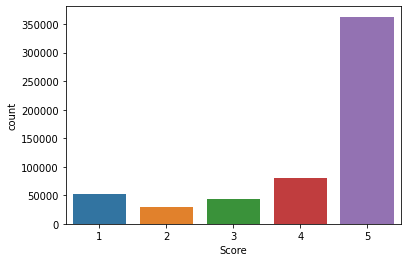

In [14]:
sns.countplot(x="Score",data=df)

#### `from the above plot we found that most the given score 5`

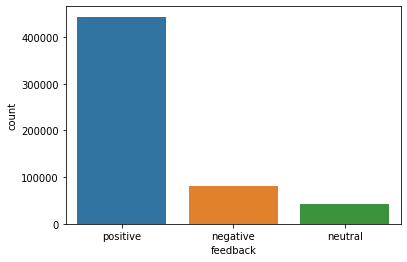

In [15]:
sns.countplot(x="feedback",data=df)

#### most of the people who reviewed given` positive review`

In [16]:
df["Helpfulness"] = (df["HelpfulnessNumerator"]/df["HelpfulnessDenominator"]).apply(lambda n: ">75%" if n > 0.75 else ("<25%" if n < 0.25 else ("25-75%" if n >= 0.25 and n <= 0.75 else "useless")))

In [17]:
df

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,feedback,Helpfulness
0,0006641040,AYZ0PR5QZROD1,Mother of 3 girls,3,3,5,1173312000,Family favorite,All of my children love this book. My first ...,positive,>75%
1,0006641040,A3CMRKGE0P909G,Teresa,3,4,5,1018396800,A great way to learn the months,This is a book of poetry about the months of ...,positive,25-75%
2,0006641040,A1DJXZA5V5FFVA,A. Conway,0,0,5,1338249600,Must have.,I set aside at least an hour each day to read...,positive,useless
3,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,5,940809600,This whole series is great way to spend time ...,I can remember seeing the show when it aired ...,positive,>75%
4,0006641040,A2ONB6ZA292PA,Rosalind Matzner,0,0,5,1313884800,Chicken soup with Rice,It's a great book with adorable illustrations...,positive,useless
...,...,...,...,...,...,...,...,...,...,...,...
568449,B009UOFTUI,AJVB004EB0MVK,D. Christofferson,0,0,1,1345852800,weak coffee not good for a premium product an...,"This coffee supposedly is premium, it tastes ...",negative,useless
568450,B009UOFU20,AJVB004EB0MVK,D. Christofferson,0,0,1,1345852800,weak coffee not good for a premium product an...,"This coffee supposedly is premium, it tastes ...",negative,useless
568451,B009UUS05I,ARL20DSHGVM1Y,Jamie,0,0,5,1331856000,Perfect,The basket was the perfect sympathy gift when...,positive,useless
568452,B009WSNWC4,AMP7K1O84DH1T,ESTY,0,0,5,1351209600,DELICIOUS,Purchased this product at a local store in NY...,positive,useless


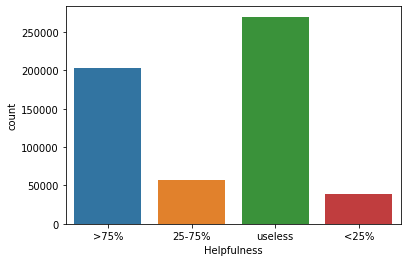

In [18]:
sns.countplot(x='Helpfulness', data=df )
plt.xlabel('Helpfulness')
plt.show()

#### Among all reviews most of them are not voted

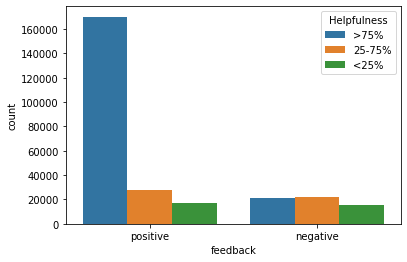

In [19]:
sns.countplot(x='feedback', hue='Helpfulness', order=["positive", "negative"], hue_order=['>75%', '25-75%', '<25%'], data=df)

plt.show()

#### most of the postive reviews are helpful

In [20]:
purchases = df[['ProductId','UserId']].groupby('UserId').aggregate({'ProductId': ['count']})
purchases.columns = ['No_of_products_purchased']
purchases

,No_of_products_purchased
UserId,
#oc-R103C0QSV1DF5E,1
#oc-R109MU5OBBZ59U,1
#oc-R10LFEMQEW6QGZ,1
#oc-R10LT57ZGIB140,1
#oc-R10UA029WVWIUI,1
...,...
AZZV9PDNMCOZW,3
AZZVNIMTTMJH6,1
AZZY649VYAHQS,1


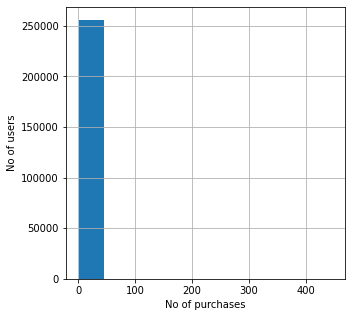

count    256059.000000
mean          2.218891
std           4.429833
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         447.000000
Name: No_of_products_purchased, dtype: float64


In [21]:
plt.figure(figsize=(5,5))
purchases['No_of_products_purchased'].hist()
plt.xlabel('No of purchases')
plt.ylabel('No of users')
plt.show()
print(purchases['No_of_products_purchased'].describe())

#### We can see that majority of the users purchased only 1 product. Maximum number of product purchased by a single user is 448.

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import string
import matplotlib.pyplot as plt

In [23]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
pos = df.loc[df['feedback'] == 'positive']
pos = pos[0:50000]

neg = df.loc[df['feedback'] == 'negative']
neg=neg[0:25000]

nut= df.loc[df['feedback'] == 'neutral']
nut  = nut[0:20000]

In [25]:
def create_Word_Corpus(temp):
    words_corpus = ''
    for val in temp["ReviewSummary"]:
        text = str(val).lower()
        tokens = []
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        for words in tokens:
            words_corpus = words_corpus + ' ' + words
    return words_corpus
        
# Generate a word cloud image
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(pos))
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))
nut_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))

In [26]:
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('wordclouds.png', facecolor='w', bbox_inches='tight')

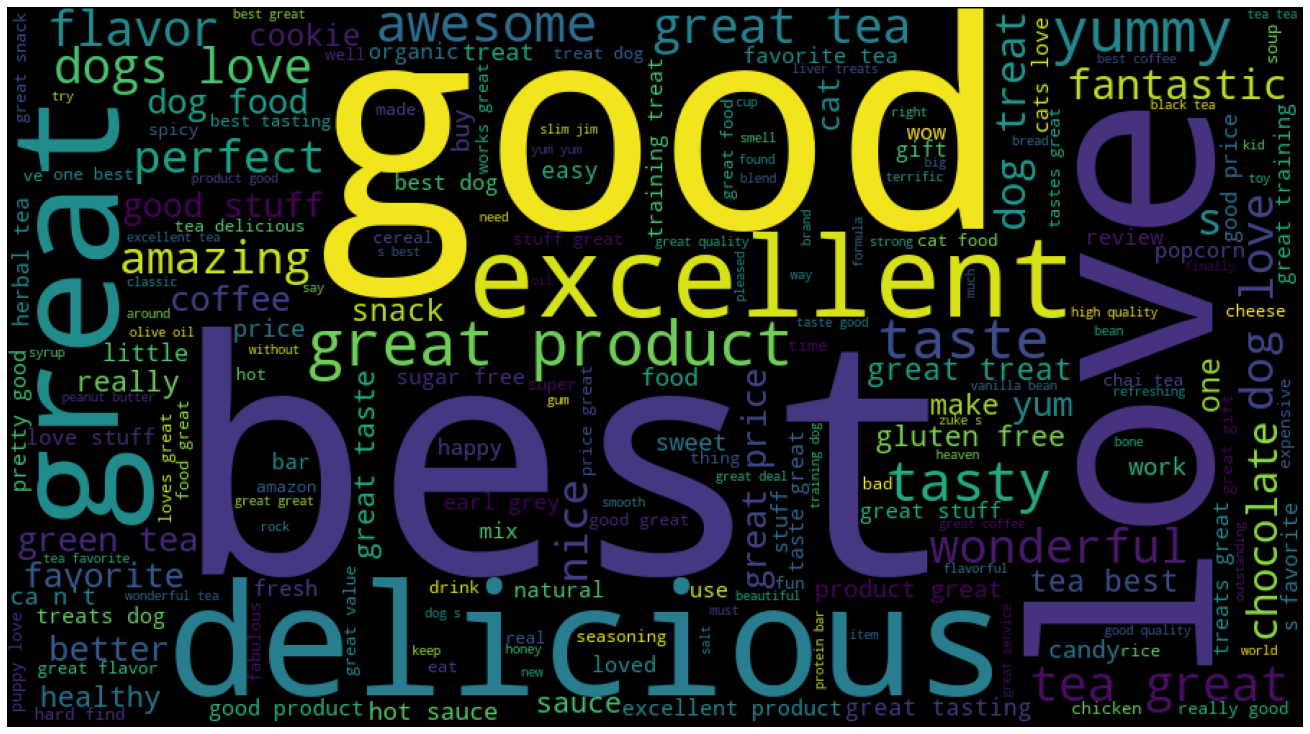

<Figure size 432x288 with 0 Axes>

In [27]:
plot_Cloud(pos_wordcloud)

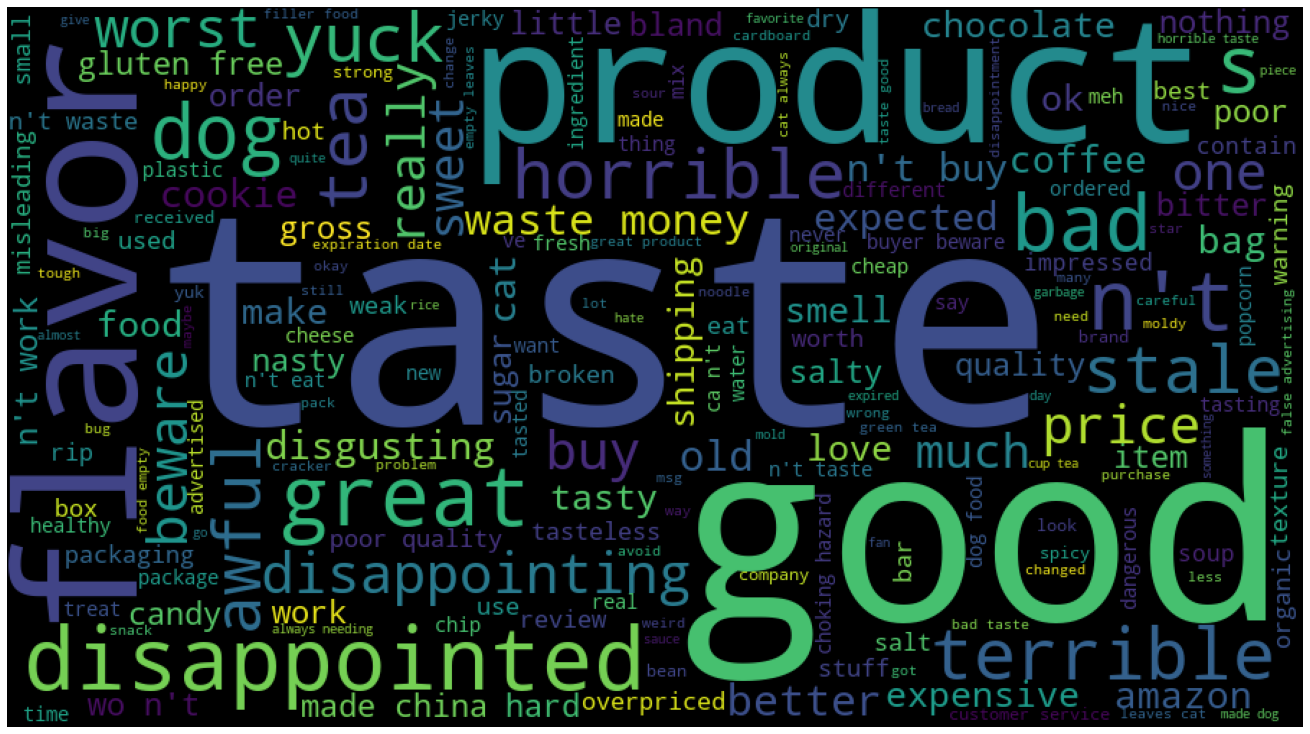

<Figure size 432x288 with 0 Axes>

In [28]:
plot_Cloud(neg_wordcloud)

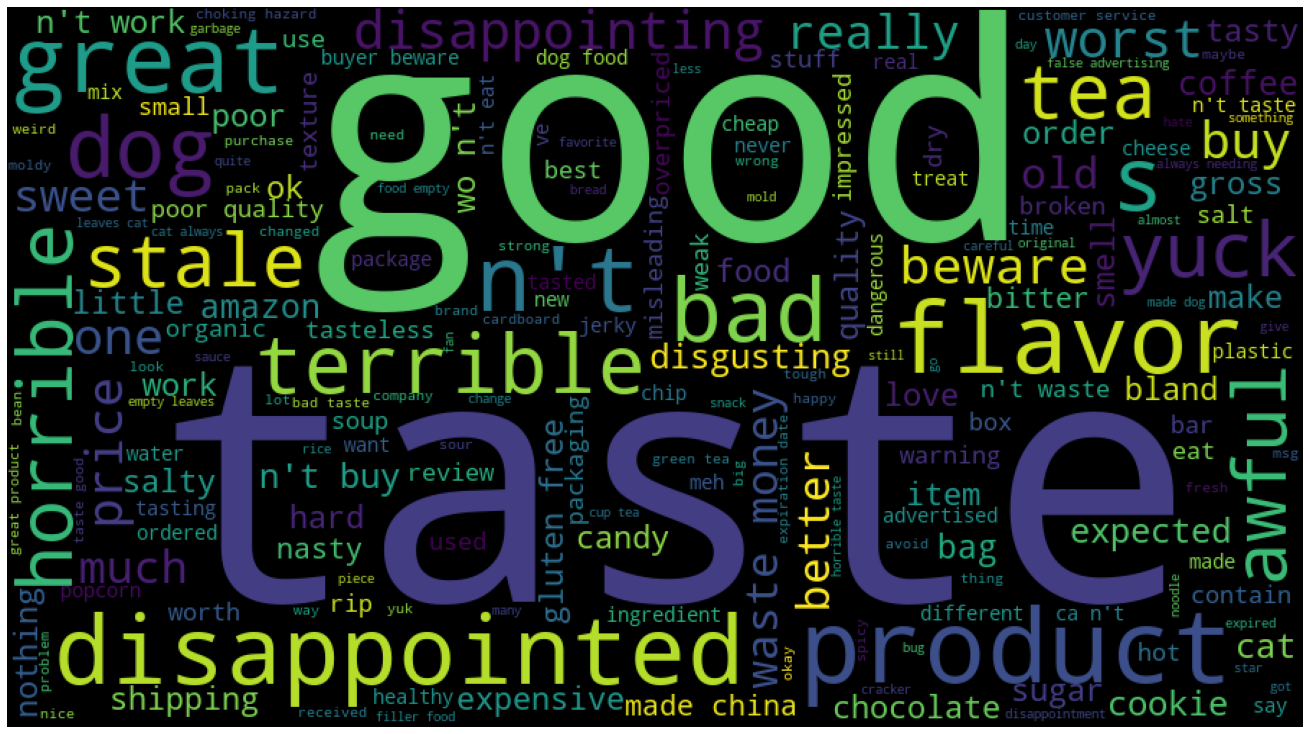

<Figure size 432x288 with 0 Axes>

In [29]:
plot_Cloud(nut_wordcloud)